### BU Sustainability: How weather impacts Waste
#### Answer a series of questions through data analysis to help BU sustainability implement the Zero Waste plan: 
1. Does temperature impact waste generation? 
2. If so, in what ways (i.e. more recycling, more of all materials, less recycling, etc.). 
3. Can we use temperature as a predictor of waste generation and service level requirements? 

### Preliminary Data Analysis
- Understand and explore data/distribution of various datasets provided
- Work towards answering the main questions of the project

In [1]:
#Imports
import numpy as np
import pandas as pd
import random, glob, time
import matplotlib.pyplot as plt

DATA_PATH = 'data/'

In [2]:
csv_files = glob.glob(DATA_PATH+"*.csv")
csv_files

['data/readings_device.39671_from.2022-07-01_to.2022-10-02.csv',
 'data/Hauler_Response_Pick-Up_2023-01-04_1018.csv',
 'data/readings_device.39686_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39686_from.2021-07-16_to.2021-10-02.csv',
 'data/readings_device.24668_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39671_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39667_from.2021-07-01_to.2021-10-02.csv',
 'data/readings_device.39686_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39874_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39691_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39667_from.2022-01-01_to.2022-04-02.csv',
 'data/readings_device.39874_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39569_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39689_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.24572_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39665_from.202

In [3]:
xl_files = glob.glob(DATA_PATH+"*.xl*")
xl_files

['data/File Overview.xlsx', 'data/BU Daily Weights FY22.xlsx']

In [4]:
'data/Alert_Flag_History_2023-01-04_1029.csv'
'data/PSI_Readings_with_Weather_2023-01-04_1026.csv'
'data/Hauler_Response_Pick-Up_2023-01-04_1018.csv'
'data/BU Daily Weights FY22.xlsx'

'data/BU Daily Weights FY22.xlsx'

In [ ]:
reading_df = pd.read_csv(csv_files[3])
reading_df

In [ ]:
## Hauler response
hauler_df = pd.read_csv('data/Hauler_Response_Pick-Up_2023-01-04_1018.csv')
hauler_df

In [5]:
## Events to get device #
events_df = pd.read_csv('data/Events_2023-01-04_1022.csv', low_memory=False)
events_df.shape

(59710, 20)

In [6]:
events_df.columns

Index(['Account', 'Site', 'Device', 'Serial No.', 'Last PSI', 'Last Full Date',
       'Last Empty Date', 'Events', 'Event Date', 'Reference Number',
       'Event Data', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [7]:
device_serial_id_mapping = {}

for i, row in events_df.iterrows():
    if pd.notna(row['Unnamed: 13']):
        if "deviceId" in row['Unnamed: 13']:
            deviceID = row['Unnamed: 13'][9:]
            serialNo = row['Serial No.']
            device_serial_id_mapping[int(deviceID)] = serialNo

In [8]:
device_serial_id_mapping

{39599: 31200,
 39689: 31168,
 39666: 31175,
 39691: 31171,
 39673: 31182,
 39671: 31180,
 39674: 31173,
 39688: 31167,
 39668: 31177,
 39569: 31203,
 39880: 31186,
 39874: 31185,
 39693: 31170,
 23565: 31337,
 39667: 31176,
 39878: 31183,
 24668: 30932,
 39873: 31191,
 39600: 31201,
 39665: 31174,
 39692: 31172,
 39686: 31165,
 39685: 31164,
 39669: 31178}

### Append all device readings into a single df

In [9]:
device_reading_files = glob.glob(DATA_PATH+"/readings*")
print(len(device_reading_files))
device_reading_files

117


['data/readings_device.39671_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39686_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39686_from.2021-07-16_to.2021-10-02.csv',
 'data/readings_device.24668_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39671_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39667_from.2021-07-01_to.2021-10-02.csv',
 'data/readings_device.39686_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39874_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39691_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39667_from.2022-01-01_to.2022-04-02.csv',
 'data/readings_device.39874_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39569_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39689_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.24572_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39665_from.2022-01-01_to.2022-04-02.csv',
 'data/readings_device.39

In [11]:
#Loop over each file and append and sort
for i, dev_filename in enumerate(device_reading_files):
    if i==0:
        device_df = pd.read_csv(dev_filename)
        device_df['device_id'] = int(dev_filename[21:26])
        device_df['serial_no'] = int(device_serial_id_mapping[int(dev_filename[21:26])])
    else:
        new_device = pd.read_csv(dev_filename)
        new_device['device_id'] = dev_filename[21:26]
        try:
            new_device['serial_no'] = int(device_serial_id_mapping[int(dev_filename[21:26])])
            device_df = pd.concat([device_df, new_device])
        except:
            print("Device ID {} doesn't have a serial number".format(dev_filename[21:26]))
        
#Convert timestamp to timestamp dtype
device_df.rename(columns={"readingDtUtz": "timestamp"}, inplace=True)
device_df.timestamp = pd.to_datetime(device_df.timestamp)

#Create Date column
device_df['date'] = pd.to_datetime(device_df.timestamp.dt.date)

device_df.sort_values(by=["device_id", "timestamp"], inplace=True)
device_df.reset_index(inplace=True, drop=True)

print(device_df.shape, device_df.columns)

Device ID 24572 doesn't have a serial number
Device ID 24572 doesn't have a serial number
Device ID 24990 doesn't have a serial number
Device ID 24363 doesn't have a serial number
Device ID 24363 doesn't have a serial number
Device ID 24990 doesn't have a serial number
Device ID 24990 doesn't have a serial number
Device ID 24363 doesn't have a serial number
Device ID 24572 doesn't have a serial number
Device ID 24572 doesn't have a serial number
Device ID 24572 doesn't have a serial number
Device ID 24363 doesn't have a serial number
Device ID 24990 doesn't have a serial number
Device ID 24363 doesn't have a serial number
Device ID 24990 doesn't have a serial number
(146912, 7) Index(['timestamp', 'valuePsi', 'celsius', 'fahrenheit', 'device_id',
       'serial_no', 'date'],
      dtype='object')


In [12]:
device_df.device_id.unique()

array([39671, '24668', '39569', '39599', '39600', '39665', '39667',
       '39668', '39669', '39671', '39673', '39674', '39685', '39686',
       '39688', '39689', '39691', '39692', '39693', '39874', '39878',
       '39880'], dtype=object)

In [ ]:
pd.to_datetime(device_df.timestamp[0])

In [13]:
device_df

,timestamp,valuePsi,celsius,fahrenheit,device_id,serial_no,date
0,2022-07-01 04:35:52,256,20.20,68.360,39671,31180,2022-07-01
1,2022-07-01 04:36:39,200,20.20,68.360,39671,31180,2022-07-01
2,2022-07-01 04:37:11,240,20.20,68.360,39671,31180,2022-07-01
3,2022-07-01 06:42:44,200,20.20,68.360,39671,31180,2022-07-01
4,2022-07-01 08:04:31,280,22.52,72.536,39671,31180,2022-07-01
...,...,...,...,...,...,...,...
146907,2022-09-30 21:42:20,528,13.46,56.228,39880,31186,2022-09-30
146908,2022-10-01 15:20:35,592,14.40,57.920,39880,31186,2022-10-01
146909,2022-10-01 15:21:06,592,14.40,57.920,39880,31186,2022-10-01
146910,2022-10-01 19:09:56,584,14.40,57.920,39880,31186,2022-10-01


In [14]:
### Group data by date and device ID to get mean temp/PSI data
all_devices_mean_df = device_df.groupby(['device_id','serial_no','date']).mean().reset_index()

In [15]:
all_devices_mean_df

,device_id,serial_no,date,valuePsi,celsius,fahrenheit
0,39671,31180,2022-07-01,253.333333,24.822500,76.680500
1,39671,31180,2022-07-02,331.200000,28.178000,82.720400
2,39671,31180,2022-07-03,280.400000,26.006000,78.810800
3,39671,31180,2022-07-04,279.272727,24.530909,76.155636
4,39671,31180,2022-07-05,182.800000,22.599000,72.678200
...,...,...,...,...,...,...
7161,39880,31186,2022-09-27,502.000000,19.840000,67.712000
7162,39880,31186,2022-09-28,525.333333,17.156667,62.882000
7163,39880,31186,2022-09-29,552.000000,15.150000,59.270000
7164,39880,31186,2022-09-30,590.000000,12.020000,53.636000


In [35]:
all_devices_mean_df.columns

Index(['device_id', 'serial_no', 'date', 'valuePsi', 'celsius', 'fahrenheit'], dtype='object')

In [122]:
all_devices_mean_df.date.max()

Timestamp('2022-10-01 00:00:00')

In [17]:
all_devices_mean_df.date.dtype

dtype('<M8[ns]')

### Incorporate PSI, wind speed and Site details

In [112]:
### First join PSI, wind speed and site address by serial no
psi_weather = pd.read_csv('data/PSI_Readings_with_Weather_2023-01-04_1026.csv')
psi_weather

,Account,Site,Device,Serial No.,Reading,Reading Date,Pressure,Wind Speed,Celsius,Fahrenheit
0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,168,2023-01-04T04:22:06,1009.0,2.28,NaN,NaN
1,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,328,2023-01-04T04:21:53,1009.0,2.28,NaN,NaN
2,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,208,2023-01-04T04:21:23,1009.0,2.28,NaN,NaN
3,Boston University,BU 685 Comm Ave,BU 685 Comm Ave,31164,720,2023-01-04T04:00:41,1009.0,2.30,NaN,NaN
4,Boston University,BU #87 College of Engineering,BU #87 College of Engineering 20 Yd,31168,600,2023-01-04T03:01:46,1009.0,2.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
99995,Boston University,BU #43 West Loading Dock,BU #43 West Loading Dock,31173,640,2022-04-30T23:02:40,1017.7,3.23,NaN,NaN
99996,Boston University,BU #43 West Loading Dock,BU #43 West Loading Dock,31173,664,2022-04-30T23:02:09,1017.7,3.23,NaN,NaN
99997,Boston University,BU #108 Agganis Arena,BU #108 Agganis Arena 35 Yd,30851,832,2022-04-30T22:58:25,1017.7,3.22,NaN,NaN
99998,Boston University,BU #108 Agganis Arena,BU #108 Agganis Arena 35 Yd,30851,808,2022-04-30T22:57:53,1017.7,3.22,NaN,NaN


In [113]:
#Create Date column
psi_weather['date'] = pd.to_datetime(psi_weather['Reading Date']).dt.date

In [114]:
psi_weather = psi_weather[['Site', 'Serial No.', 'date', 'Pressure', 'Wind Speed']]
psi_weather.rename(columns={"Serial No.": "serial_no"}, inplace=True)

/var/folders/tv/_193b47x7csf2wynj3t0cjjr0000gn/T/ipykernel_15793/2009311748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psi_weather.rename(columns={"Serial No.": "serial_no"}, inplace=True)


In [115]:
psi_mean_df = psi_weather.groupby(['serial_no','date']).mean().reset_index()
psi_mean_df

,serial_no,date,Pressure,Wind Speed
0,30845,2022-05-01,1019.500000,4.510000
1,30845,2022-05-02,1020.650000,4.245000
2,30845,2022-05-03,1022.600000,7.785000
3,30845,2022-05-04,1017.600000,2.960000
4,30845,2022-05-05,1016.933333,6.236667
...,...,...,...,...
5789,31337,2022-12-30,1024.400000,5.315000
5790,31337,2022-12-31,1019.500000,5.710000
5791,31337,2023-01-01,1005.200000,7.500000
5792,31337,2023-01-02,1017.600000,3.360000


In [116]:
psi_site_join = psi_weather[['serial_no', 'Site']].drop_duplicates().reset_index(drop=True)

In [117]:
#join site back 
psi_mean_df = psi_mean_df.merge(psi_site_join, on='serial_no')
psi_mean_df.reset_index(inplace = True, drop=True)

In [120]:
psi_mean_df

,serial_no,date,Pressure,Wind Speed,Site
0,30845,2022-05-01,1019.500000,4.510000,BU #4 Yawkey
1,30845,2022-05-02,1020.650000,4.245000,BU #4 Yawkey
2,30845,2022-05-03,1022.600000,7.785000,BU #4 Yawkey
3,30845,2022-05-04,1017.600000,2.960000,BU #4 Yawkey
4,30845,2022-05-05,1016.933333,6.236667,BU #4 Yawkey
...,...,...,...,...,...
5789,31337,2022-12-30,1024.400000,5.315000,Boston University - 120 ASHFORD
5790,31337,2022-12-31,1019.500000,5.710000,Boston University - 120 ASHFORD
5791,31337,2023-01-01,1005.200000,7.500000,Boston University - 120 ASHFORD
5792,31337,2023-01-02,1017.600000,3.360000,Boston University - 120 ASHFORD


In [139]:
### Join Readings with Site
device_readings_site_df = pd.merge(all_devices_mean_df, psi_site_join, on='serial_no')

In [148]:
device_readings_site_df

,device_id,serial_no,date,valuePsi,celsius,fahrenheit,Site
0,39671,31180,2022-07-01,253.333333,24.822500,76.680500,BU #82 Warren Towers 35
1,39671,31180,2022-07-02,331.200000,28.178000,82.720400,BU #82 Warren Towers 35
2,39671,31180,2022-07-03,280.400000,26.006000,78.810800,BU #82 Warren Towers 35
3,39671,31180,2022-07-04,279.272727,24.530909,76.155636,BU #82 Warren Towers 35
4,39671,31180,2022-07-05,182.800000,22.599000,72.678200,BU #82 Warren Towers 35
...,...,...,...,...,...,...,...
7161,39880,31186,2022-09-27,502.000000,19.840000,67.712000,BU #69 - Graduate Apartments
7162,39880,31186,2022-09-28,525.333333,17.156667,62.882000,BU #69 - Graduate Apartments
7163,39880,31186,2022-09-29,552.000000,15.150000,59.270000,BU #69 - Graduate Apartments
7164,39880,31186,2022-09-30,590.000000,12.020000,53.636000,BU #69 - Graduate Apartments


In [145]:
device_readings_site_df.Site.value_counts()

BU #35 22 Babbit                   396
BU #82 Warren Towers 35            394
BU #2 Student Village              392
BU #90 - School of Law             388
BU #87 College of Engineering      385
BU #46 30 Bay State                382
BU MED - 15 Stoughton              379
BU #43 West Loading Dock           377
BU #38 Life Sciences               377
BU #72 Rafik B Hariri              372
BU #48 Student Village #2          361
BU 140 Bay State Rd                360
BU #4 Yawkey                       359
BU 685 Comm Ave                    356
BU #93 George Sherman Union        336
BU #96 808 Commonwealth            335
BU Med 700                         279
BU #69 - Graduate Apartments       270
BU #105 Kilachand Hall             240
BU #102 Student Health Services    236
BU Med #815 Albany                 192
Name: Site, dtype: int64

### Join daily weight data using Site and Date

In [132]:
#Join daily weight data
daily_weights_df = pd.read_excel('data/BU Daily Weights FY22.xlsx')
daily_weights_df

,Customer Key,Location,Address,Work Order Date,Material,Tons
0,31582.0,200 Riverway,200 Riverway,2022-06-27,Trash,1.88
1,31582.0,200 Riverway,200 Riverway,2022-06-09,Trash,2.13
2,31582.0,200 Riverway,200 Riverway,2022-05-24,Trash,2.60
3,31582.0,200 Riverway,200 Riverway,2022-05-14,Trash,2.95
4,31582.0,200 Riverway,200 Riverway,2022-05-07,Trash,2.99
...,...,...,...,...,...,...
18169,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-09-10,Compost,5.52
18170,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-09-02,Compost,2.78
18171,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-08-26,Compost,1.90
18172,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-07-27,Compost,0.93


In [133]:
daily_weights_df = daily_weights_df[daily_weights_df['Customer Key'].notna()]
daily_weights_df['Customer Key'] = daily_weights_df['Customer Key'].astype(int)

/var/folders/tv/_193b47x7csf2wynj3t0cjjr0000gn/T/ipykernel_15793/441113701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_weights_df['Customer Key'] = daily_weights_df['Customer Key'].astype(int)


In [134]:
daily_weights_df.rename(columns={"Customer Key": "serial_no", 
                                "Work Order Date": "date", "Location":"Site"}, inplace=True)
daily_weights_df.drop(columns = "Address", inplace = True)

/var/folders/tv/_193b47x7csf2wynj3t0cjjr0000gn/T/ipykernel_15793/2933836269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_weights_df.rename(columns={"Customer Key": "serial_no",
/var/folders/tv/_193b47x7csf2wynj3t0cjjr0000gn/T/ipykernel_15793/2933836269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_weights_df.drop(columns = "Address", inplace = True)


In [135]:
daily_weights_df.date.dtype

dtype('<M8[ns]')

In [136]:
daily_weights_df.columns

Index(['serial_no', 'Site', 'date', 'Material', 'Tons'], dtype='object')

In [146]:
daily_weights_df.Site.value_counts()

BU #112 - 949 Comm Ave        477
BU #4 - Yawkey Center         433
BU #30 - Blanford             425
BU #2 - Student Village       398
BU #75 - College of Health    379
                             ... 
BU- Nickerson Event             3
BU- 25 Pilgrim TEMP             3
BU- 808 Commonwealth TEMP       2
BU #120 - 745 Comm Ave          1
BU SECURE- 25 Pilgrim           1
Name: Site, Length: 151, dtype: int64

### Perform SQL inner join to avoid Nans

In [141]:
device_readings_weights_df = pd.merge(device_readings_site_df, daily_weights_df, how = 'inner',
                                      on=['date', 'Site'])

In [142]:
device_readings_weights_df

,device_id,serial_no_x,date,valuePsi,celsius,fahrenheit,Site,serial_no_y,Material,Tons
0,39688,31167,2021-08-20,596.000000,30.755000,87.359000,BU #90 - School of Law,31936,Recycling,0.0275
1,39688,31167,2021-08-24,620.000000,27.512500,81.522500,BU #90 - School of Law,31936,Recycling,0.0250
2,39688,31167,2021-08-27,597.714286,34.627143,94.328857,BU #90 - School of Law,31936,Recycling,0.0250
3,39688,31167,2021-08-31,892.444444,22.646667,72.764000,BU #90 - School of Law,31936,Recycling,0.0330
4,39688,31167,2021-09-03,726.400000,19.928000,67.870400,BU #90 - School of Law,31936,Recycling,0.0740
...,...,...,...,...,...,...,...,...,...,...
184,39880,31186,2022-06-07,492.000000,21.960000,71.528000,BU #69 - Graduate Apartments,31894,Recycling,0.0250
185,39880,31186,2022-06-10,684.000000,23.440000,74.192000,BU #69 - Graduate Apartments,31894,Recycling,0.0250
186,39880,31186,2022-06-14,796.000000,26.220000,79.196000,BU #69 - Graduate Apartments,31894,Recycling,0.0300
187,39880,31186,2022-06-16,438.000000,19.980000,67.964000,BU #69 - Graduate Apartments,31894,Trash,3.9700


In [143]:
device_readings_weights_df.device_id.value_counts()

39688    118
39880     71
Name: device_id, dtype: int64

### Look at Alert Types

In [55]:
alert_flag_df = pd.read_csv('data/Alert_Flag_History_2023-01-04_1029.csv')
alert_flag_df

,Account,Site,Device,Serial No.,Alert Type,Beginning Date,End Date,Days Open
0,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,Full Event Not Triggered,2021-08-25T12:29:06,2021-08-29T15:11:26,4
1,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,Device Comm Error,2021-09-01T20:05:03,2021-09-01T20:09:28,0
2,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,Full Event Not Triggered,2021-09-09T20:13:29,2021-09-29T19:23:02,19
3,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,Device Comm Error,2021-10-02T15:21:02,2021-10-06T11:11:08,4
4,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,No PSI Readings,2021-10-05T04:18:01,2021-10-06T11:11:08,1
...,...,...,...,...,...,...,...,...
759,Boston University,BU #43 West Loading Dock,BU #43 West Loading Dock,31173,Full Event Not Triggered,2022-12-26T17:15:23,NaN,9
760,Boston University,BU #46 30 Bay State,BU #46 30 Bay State 20 Yd,31200,Full Event Not Triggered,2022-12-26T06:14:06,NaN,9
761,Boston University,BU 685 Comm Ave,BU 685 Comm Ave,31164,Full Event Not Triggered,2022-12-20T04:45:39,NaN,15
762,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,Full Event Not Triggered,2022-11-28T17:46:24,NaN,37


Text(0.5, 1.0, 'Number of Alerts for each alert type')

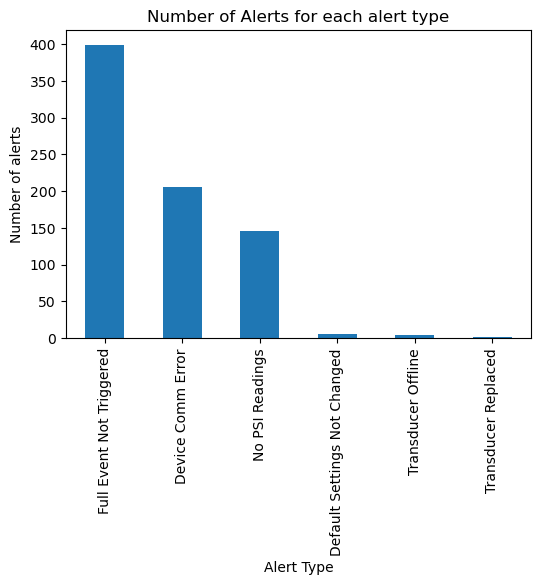

In [56]:
plt.figure(figsize=(6,4))
alert_flag_df['Alert Type'].value_counts().plot.bar()
plt.xlabel("Alert Type")
plt.ylabel("Number of alerts")
plt.title("Number of Alerts for each alert type")

### Investigate PSI Readings with Weather

In [57]:
psi_weather = pd.read_csv('data/PSI_Readings_with_Weather_2023-01-04_1026.csv')
psi_weather

,Account,Site,Device,Serial No.,Reading,Reading Date,Pressure,Wind Speed,Celsius,Fahrenheit
0,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,168,2023-01-04T04:22:06,1009.0,2.28,NaN,NaN
1,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,328,2023-01-04T04:21:53,1009.0,2.28,NaN,NaN
2,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,208,2023-01-04T04:21:23,1009.0,2.28,NaN,NaN
3,Boston University,BU 685 Comm Ave,BU 685 Comm Ave,31164,720,2023-01-04T04:00:41,1009.0,2.30,NaN,NaN
4,Boston University,BU #87 College of Engineering,BU #87 College of Engineering 20 Yd,31168,600,2023-01-04T03:01:46,1009.0,2.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
99995,Boston University,BU #43 West Loading Dock,BU #43 West Loading Dock,31173,640,2022-04-30T23:02:40,1017.7,3.23,NaN,NaN
99996,Boston University,BU #43 West Loading Dock,BU #43 West Loading Dock,31173,664,2022-04-30T23:02:09,1017.7,3.23,NaN,NaN
99997,Boston University,BU #108 Agganis Arena,BU #108 Agganis Arena 35 Yd,30851,832,2022-04-30T22:58:25,1017.7,3.22,NaN,NaN
99998,Boston University,BU #108 Agganis Arena,BU #108 Agganis Arena 35 Yd,30851,808,2022-04-30T22:57:53,1017.7,3.22,NaN,NaN


In [58]:
psi_weather[psi_weather['Serial No.'] == '24572']

,Account,Site,Device,Serial No.,Reading,Reading Date,Pressure,Wind Speed,Celsius,Fahrenheit


In [ ]:
psi_weather.columns

In [ ]:
psi_weather[['Device', 'Serial No.']].value_counts()

In [ ]:
psi_weather.describe()

In [ ]:
plt.figure(figsize=(6,4))
psi_weather.groupby(['Serial No.'])['Pressure'].mean().plot.bar()
plt.xlabel("Device Serial")
plt.ylabel("Atmospheric Pressure")
plt.title("Atmospheric Pressure for each Device")

In [ ]:
plt.figure(figsize=(6,4))
psi_weather.groupby(['Device'])['Reading'].mean().plot.bar()
plt.xlabel("Device Name")
plt.ylabel("Device PSI Reading")
plt.title("Mean PSI Reading for each Device")

In [ ]:
psi_weather.groupby(['Device'])['Wind Speed'].mean().plot.bar()
plt.xlabel("Device Name")
plt.ylabel("Wind Speed")
plt.title("Mean Wind Speed for each Device")

### Look at Device Compactions

In [ ]:
deviceCompaction_df = pd.read_csv('data/Device_Compaction_Frequency_2023-01-04_1019.csv')
deviceCompaction_df

In [ ]:
plt.figure(figsize=(6,4))
deviceCompaction_df.groupby(['Site'])['Total Compactions'].mean().plot.bar()
plt.xlabel("Site Name")
plt.ylabel("Number of Compactions")
plt.title("Compactions by Site")

### Look at Daily Weights

In [ ]:
daily_weights_df = pd.read_excel('data/BU Daily Weights FY22.xlsx')
daily_weights_df

In [ ]:
daily_weights_df['Customer Key'].unique()

In [ ]:
daily_weights_df.groupby('Material')['Tons'].mean().plot.bar()
plt.xlabel("Waste Type")
plt.ylabel("Mean Daily Weight")
plt.title("Mean Daily Weight by Waste Type")

In [ ]:
daily_weights_df['Location'].value_counts()[0:20]

In [ ]:
warren_towers_df = daily_weights_df[daily_weights_df['Location'] == 'BU #82 - Warren Towers']
warren_towers_df

In [ ]:
warren_towers_df.groupby('Material')['Tons'].mean().plot.bar()
plt.xlabel("Waste Type")
plt.ylabel("Mean Daily Weight")
plt.title("Mean Daily Weight by Waste Type at Warren Towers")

### Join and Consolidate Datasets